# The Boston Housing Dataset

## Навигация
1. [Подключение библиотек и загрузка датасета](#Подключение-библиотек-и-загрузка-датасета)
2. [Описание датасета](#Описание-датасета)
    1. [Описание полей набора данных](#Описание-полей-набора-данных)
    2. [Структура датасета](#Структура-датасета)
3. [Задание №1](#Задание-№1)
    1. [Постановка задачи](#Постановка-задачи)
    2. [Разделение датасета на тренировочную и тестовую выборки](#Разделение-датасета-на-тренировочную-и-тестовую-выборки)
    3. [Обучение модели](#Обучение-модели)
    4. [Прогнозирование и точность обученной модели](#Прогнозирование-и-точность-обученной-модели)
    5. [Значения весовых коэффициентов и свободного b](#Значения-весовых-коэффициентов-и-свободного-b)
    6. [DataFrame на основе тестовых данных](#DataFrame-на-основе-тестовых-данных)
    7. [Feature importance](#Feature-importance)
    8. [Обучение модели на расширенном датасете](#Обучение-модели-на-расширенном-датасете)
        1. [Расширение датасета](#Расширение-датасета)
        2. [Обучение модели на расширенном датасете и оценка точности](#Обучение-модели-на-расширенном-датасете-и-оценка-точности)

## Подключение библиотек и загрузка датасета

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston

%matplotlib notebook

boston = load_boston()
x, y = boston['data'], boston['target']

## Описание датасета

*Примечание:* перевод информации о датасете может быть не точным. Информация взята [отсюда.](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)

В данном наборе данных содержится информация, собранная Службой переписи населения США в отношении жилья в районе Бостон Массачусетс. Она была получена из архива [StatLib](http://lib.stat.cmu.edu/datasets/boston) и широко использовалась во всей литературе для сравнения алгоритмов. Однако эти сравнения проводились в основном за пределами Делве и, таким образом, вызывают некоторое подозрение. Набор данных невелик по размеру и насчитывает всего 506 случаев.

Первоначально данные были опубликованы в Harrison, D. and Rubinfeld, D.L. "Hedonic prices and the demand for clean air", J. Environ. Economics & Management, vol.5, 81-102, 1978.

### Описание полей набора данных
1. `CRIM` — Уровень преступности на душу населения по городам;
2. `ZN` — Доля жилой земли, распределенной на участки площадью более 25 000 кв. футов;
3. `INDUS` — Доля акров, не относящихся к розничной торговле, на город;
4. `CHAS` — Бинарная переменная Charles River (1 если участок граничит с рекой; иначе 0);
5. `NOX` — Концентрация оксидов азота (частей на 10 миллионов);
6. `RM` — Среднее количество комнат на квартиру;
7. `AGE` — Доля занятых владельцами жилых единиц, построенных до 1940 года;
8. `DIS` — Взвешенные расстояния до пяти Бостонских центров занятости;
9. `RAD` — Индекс доступности к кольцевым магистралям;
10. `TAX` — Ставка налога на недвижимость в полном объёме в \\$10,000;
11. `PTRATIO` — Cоотношение учеников к учителям по городам;
12. `B` — $1000⋅(Bk - 0.63)^2$, где $Bk$ — доля чернокожих по городу;
13. `LSTAT` — % более низкого статуса населения;
14. `MEDV` — Медианная стоимость домов, заселенных владельцами, в \\$1000;

### Структура датасета

In [2]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

`boston['data']` представляет собой матрицу, в которой строка — определенная квартира, а столбец — 1 из 13 признаков, представленных выше. `boston['target']` — вектор из 506 элементов, где $i$-ый элемент является медианной стоимостью $i$-ого дома.

In [3]:
print(boston['data'].shape)
print(boston['target'].shape)

(506, 13)
(506,)


In [4]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Задание №1
### Постановка задачи
Изучить набор данных boston_house, применить линейный классификатор для прогноза медианной цены. Организовать DataFrame на основе тестовых данных (в качестве столбцов использовать признаки, значения y_test, значения y_pred, разницу между y_pred и y_test). Вывести полученные значения весовых коэффициентов и свободного b, вычислить точность. А также:
1. Найти feature importance;
2. Расширить датасет следующим образом: 13 (столбцов исходных признаков) + 13 (квадраты каждого признака) + $\frac{13!}{(13 - 2)!*2!}$ (попарные произведения) = $26 + \frac{13*12}{2}$ = 104 столбца в расширенном датасете. Обучить модель с полученным датасетом и оценить его точность.

### Разделение датасета на тренировочную и тестовую выборки

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

### Обучение модели

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)

### Прогнозирование и точность обученной модели

In [7]:
np.set_printoptions(precision=1)

y_pred = lr.predict(X_test)

print("Метки тестового набора:\n", y_test)
print("\nПрогнозы для тестового набора\n", y_pred)

Метки тестового набора:
 [22.6 50.  23.   8.3 21.2 19.9 20.6 18.7 16.1 18.6  8.8 17.2 14.9 10.5
 50.  29.  23.  33.3 29.4 21.  23.8 19.1 20.4 29.1 19.3 23.1 19.6 19.4
 38.7 18.7 14.6 20.  20.5 20.1 23.6 16.8  5.6 50.  14.5 13.3 23.9 20.
 19.8 13.8 16.5 21.6 20.3 17.  11.8 27.5 15.6 23.1 24.3 42.8 15.6 21.7
 17.1 17.2 15.  21.7 18.6 21.  33.1 31.5 20.1 29.8 15.2 15.  27.5 22.6
 20.  21.4 23.5 31.2 23.7  7.4 48.3 24.4 22.6 18.3 23.3 17.1 27.9 44.8
 50.  23.  21.4 10.2 23.3 23.2 18.9 13.4 21.9 24.8 11.9 24.3 13.8 24.7
 14.1 18.7 28.1 19.8 26.7 21.7 22.  22.9 10.4 21.9 20.6 26.4 41.3 17.2
 27.1 20.4 16.5 24.4  8.4 23.   9.7 50.  30.5 12.3 19.4 21.2 20.3 18.8
 33.4]

Прогнозы для тестового набора
 [25.  23.6 29.2 12.  21.3 19.5 20.4 21.5 19.  20.   4.9 16.1 16.9  5.3
 39.8 32.3 22.3 36.5 31.  23.3 24.9 24.3 20.7 30.5 22.5  9.9 17.7 18.
 35.7 20.8 18.1 17.7 19.7 23.8 29.1 19.2 11.  24.6 17.3 15.2 26.1 20.9
 22.3 15.3 22.9 25.1 19.7 22.7  9.7 24.5 20.7 17.5 24.5 30.1 13.3 21.5
 20.7 15.3 13.8

In [8]:
print('Точность на тренировочных данных: {:.2f}'.format(lr.score(X_train, y_train)))
print('Точность на тестовых данных: {:.2f}'.format(lr.score(X_test, y_test)))

Точность на тренировочных данных: 0.77
Точность на тестовых данных: 0.64


### Значения весовых коэффициентов и свободного b
Множественная линейная регрессионная модель имеет следующий вид:

$$y=\omega_0 x_0 + \omega_1 x_1 +...+ \omega_n x_n + b$$

Здесь:
* $\omega_i$ — весовые параметры (коэффициенты) регрессии;
* $x_i$ — регрессоры модели (строка признаков из `boston['data']`);
* $b$ — свободный член;
* $y$ — результат предсказания.

Для определения полученных весовых коэффициетов $\omega_i$ и свободного $b$ вызовем встроенные методы модели, обученной линейной регрессией, `.coef_` и `.intercept_` соответственно:

In [9]:
print(f'lr coeff = {lr.coef_}')
print(f'lr intercept = {lr.intercept_}')

lr coeff = [-1.2e-01  4.4e-02 -5.8e-03  2.4e+00 -1.6e+01  3.8e+00 -7.0e-03 -1.4e+00
  2.4e-01 -1.1e-02 -9.9e-01  8.4e-03 -5.0e-01]
lr intercept = 36.93325545711947


### DataFrame на основе тестовых данных

In [10]:
test_df = pd.DataFrame(X_test, columns=boston['feature_names'])

test_df['y_test'] = y_test
test_df['y_pred'] = y_pred
test_df['sub_y'] = abs(y_test - y_pred)

test_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y_test,y_pred,sub_y
0,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34,22.6,24.952333,2.352333
1,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0,23.616997,26.383003
2,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50,23.0,29.205886,6.205886
3,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77,8.3,11.960705,3.660705
4,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34,21.2,21.333620,0.133620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,0.21977,0.0,6.91,0.0,0.448,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20,19.4,17.538048,1.861952
123,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,396.90,12.92,21.2,21.502223,0.302223
124,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3,23.632813,3.332813
125,0.09849,0.0,25.65,0.0,0.581,5.879,95.8,2.0063,2.0,188.0,19.1,379.38,17.58,18.8,20.282598,1.482598


### Feature importance
Feature importance подразумевает технику, которая оценивает входные характеристики, основываясь на том, насколько они полезны при прогнозировании целевой переменной.

Для нашего случая достаточно нормализовать данные, обучить модель на нормализованных данных и получить весовые коэффициенты $\omega_i$.

Подробно расписано [здесь.](https://machinelearningmastery.com/calculate-feature-importance-with-python/)

In [11]:
X_train_df = pd.DataFrame(X_train, columns=boston['feature_names'])

normalized_X_train_df = X_train_df / X_train_df.max()

normalized_X_train_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.002150,0.22,0.211247,0.0,0.494834,0.638383,0.702,0.655993,0.291667,0.464135,0.868182,0.980423,0.499189
1,0.001161,0.25,0.184932,0.0,0.520092,0.675057,0.472,0.571641,0.333333,0.399437,0.895455,1.000000,0.249324
2,0.001177,0.40,0.231074,1.0,0.513203,0.827677,0.490,0.394772,0.166667,0.357243,0.800000,0.980726,0.163602
3,0.097967,0.00,0.652487,0.0,0.795637,0.737016,0.988,0.142308,1.000000,0.936709,0.918182,0.987604,0.462953
4,0.121765,0.00,0.652487,0.0,0.779564,0.772437,0.908,0.150043,1.000000,0.936709,0.918182,0.054346,0.697404
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,0.003191,0.00,0.266042,0.0,0.566016,0.650114,0.743,0.389321,0.208333,0.403657,0.890909,0.985462,0.317469
375,0.000974,0.45,0.124009,0.0,0.501722,0.817540,0.263,0.534350,0.208333,0.559775,0.690909,0.983850,0.077610
376,0.001697,0.00,0.360851,0.0,0.628014,0.685763,0.826,0.226562,0.250000,0.607595,0.809091,0.993978,0.278529
377,0.002577,0.00,0.249099,0.0,0.514351,0.686788,0.855,0.469171,0.125000,0.327707,0.813636,0.989519,0.508383


<IPython.core.display.Javascript object>


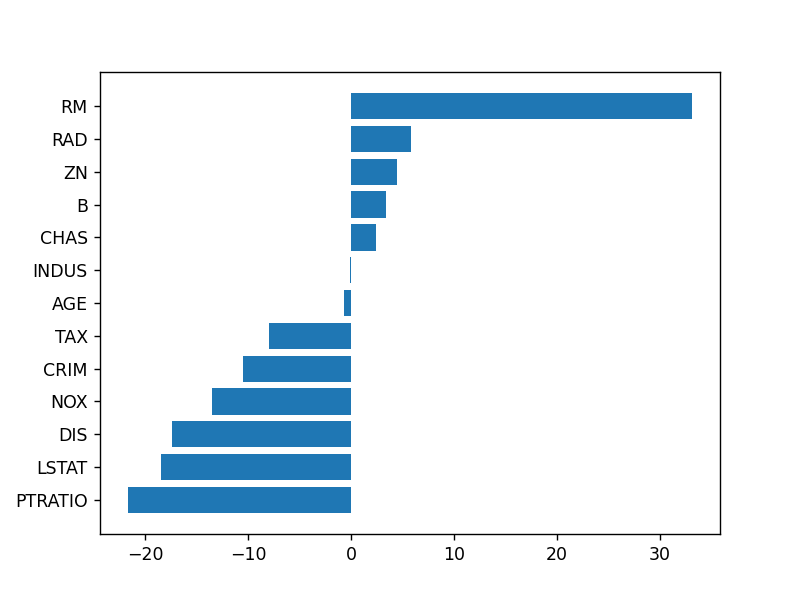

In [12]:
# Обучаем на нормализованных данных
lr = LinearRegression().fit(normalized_X_train_df, y_train)

# Сортируем пару "название признака - весовой коэффициент"
f_importances = sorted(list(zip(boston['feature_names'], lr.coef_)), key=lambda xy: xy[1])

plt.barh(
    [x[0] for x in f_importances],
    [y[1] for y in f_importances],
)

plt.show()

### Обучение модели на расширенном датасете

#### Расширение датасета

In [13]:
from itertools import combinations

pairwise_product = np.array(list(map(lambda xy: xy[0]*xy[1], combinations(x.T, 2)))).T
print(f"Размерность попарного произведения стобцов: {pairwise_product.shape}")

x = np.append(np.append(x, x**2, axis=1), pairwise_product, axis=1)

print(f"Итоговая размерность расширенного датасета: {x.shape}")

Размерность попарного произведения стобцов: (506, 78)
Итоговая размерность расширенного датасета: (506, 104)


#### Обучение модели на расширенном датасете и оценка точности

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

lr = LinearRegression().fit(X_train, y_train)

print('Точность на тренировочных данных: {:.2f}'.format(lr.score(X_train, y_train)))
print('Точность на тестовых данных: {:.2f}'.format(lr.score(X_test, y_test)))

Точность на тренировочных данных: 0.95
Точность на тестовых данных: 0.61
